# Introduction to Supervised Machine Learning
By AA Miller (2017 September 16)  
Updated by G Hosseinzadeh (2025 May 15)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The iris data set we used previously actually consists of data from 3 distinct flower species.

Load the data set again. What are the names of the three species, and how many samples of each are there?

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
target = iris.target
target_names = iris.target_names

samples, counts = np.unique(target, return_counts = True)
for name, count in zip(target_names, counts):
    print(f"{name}: {count} samples")

setosa: 50 samples
versicolor: 50 samples
virginica: 50 samples


Make a pair plot of the iris features colored by their true classification.

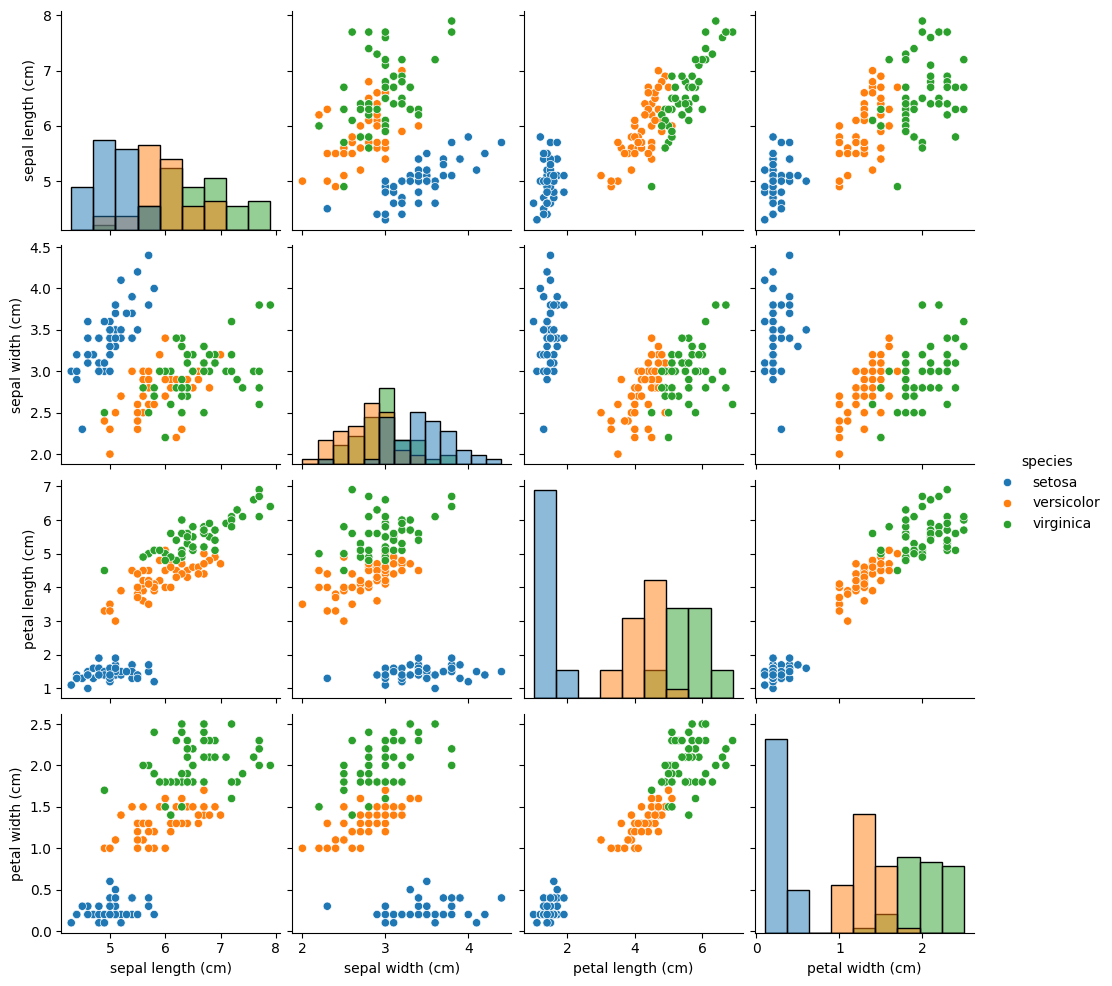

In [3]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Make the pair plot
sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()

Fit two different $K$ nearest neighbors (KNN) models to the iris data, one with 3 neighbors and one with 10 neighbors. Repeat the pair plot colored by the predicted classifications. How do the results compare to the true classifications?

In this case you're training and testing your model using the same data set. Is that a good idea?

*Hint that isn't essential, but is worth thinking about - should the features be re-scaled in any way?*

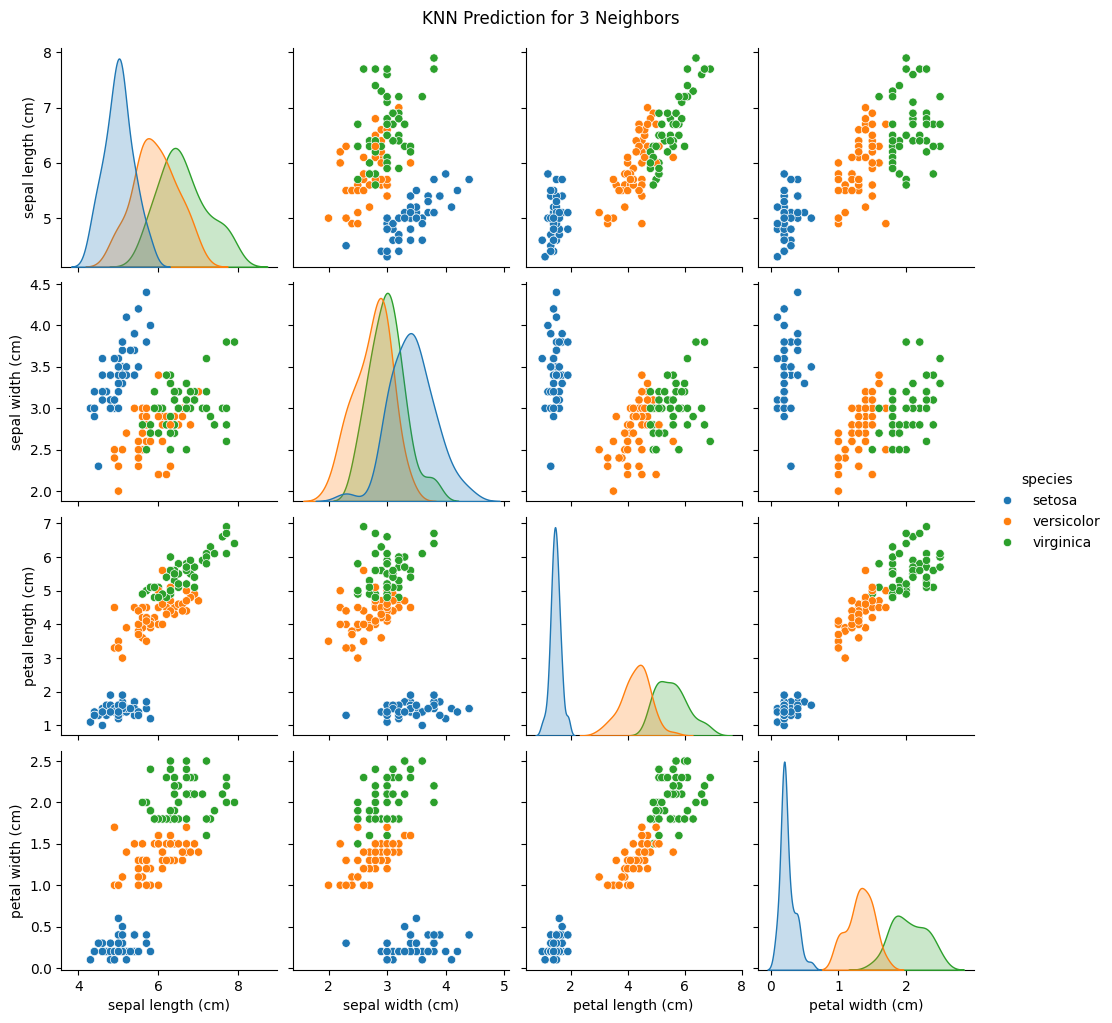

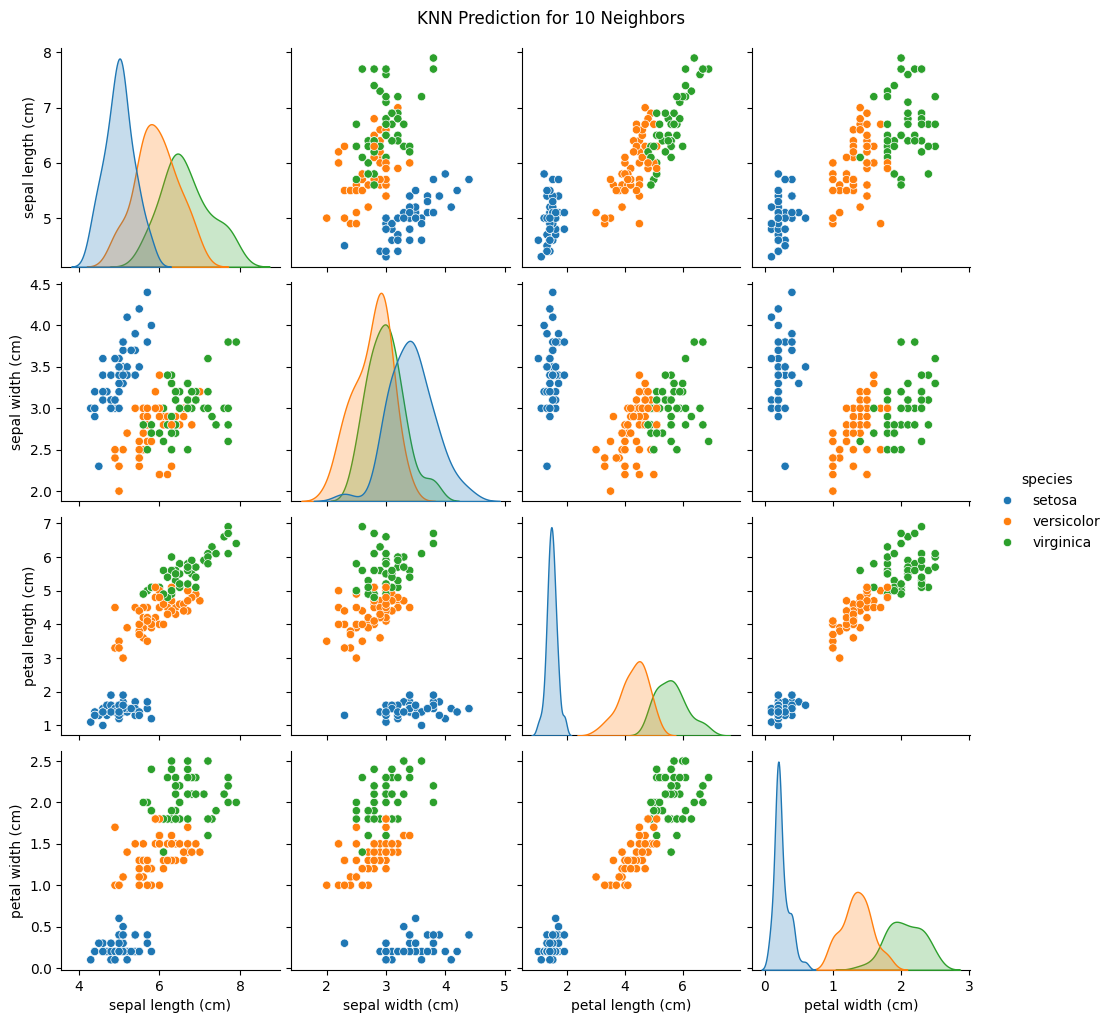

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

scale = StandardScaler() # rescaling here
x_scaled = scale.fit_transform(x)

# KNN Models
knn3 = KNeighborsClassifier(n_neighbors=3).fit(x_scaled, y)
knn10 = KNeighborsClassifier(n_neighbors=10).fit(x_scaled, y)

# predictions
y_pred_3 = knn3.predict(x_scaled)
y_pred_10 = knn10.predict(x_scaled)

# dataframes to visualize plots
dataframe = pd.DataFrame(x, columns = feature_names) # original with no predictions
dataframe['species'] = pd.Categorical.from_codes(y, target_names)

df3 = pd.DataFrame(x, columns = feature_names) # prediction with 3 neighbors
df3['species'] = pd.Categorical.from_codes(y_pred_3, target_names)

df10 = pd.DataFrame(x, columns = feature_names) # prediction with 10 neighbors
df10['species'] = pd.Categorical.from_codes(y_pred_10, target_names)

# plot
sns.pairplot(df3, hue = 'species')
plt.suptitle('KNN Prediction for 3 Neighbors', y = 1.02)
plt.show()

sns.pairplot(df10, hue = 'species')
plt.suptitle('KNN Prediction for 10 Neighbors', y = 1.02)
plt.show()

*Complete*

Produce cross-validation predictions for the iris dataset and a KNN with 5 neighbors. Plot the resulting classifications, as above, and estimate the accuracy of the model as applied to new data. How does this accuracy compare to a KNN with 50 neighbors?

*Hint - read the docs for [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)*

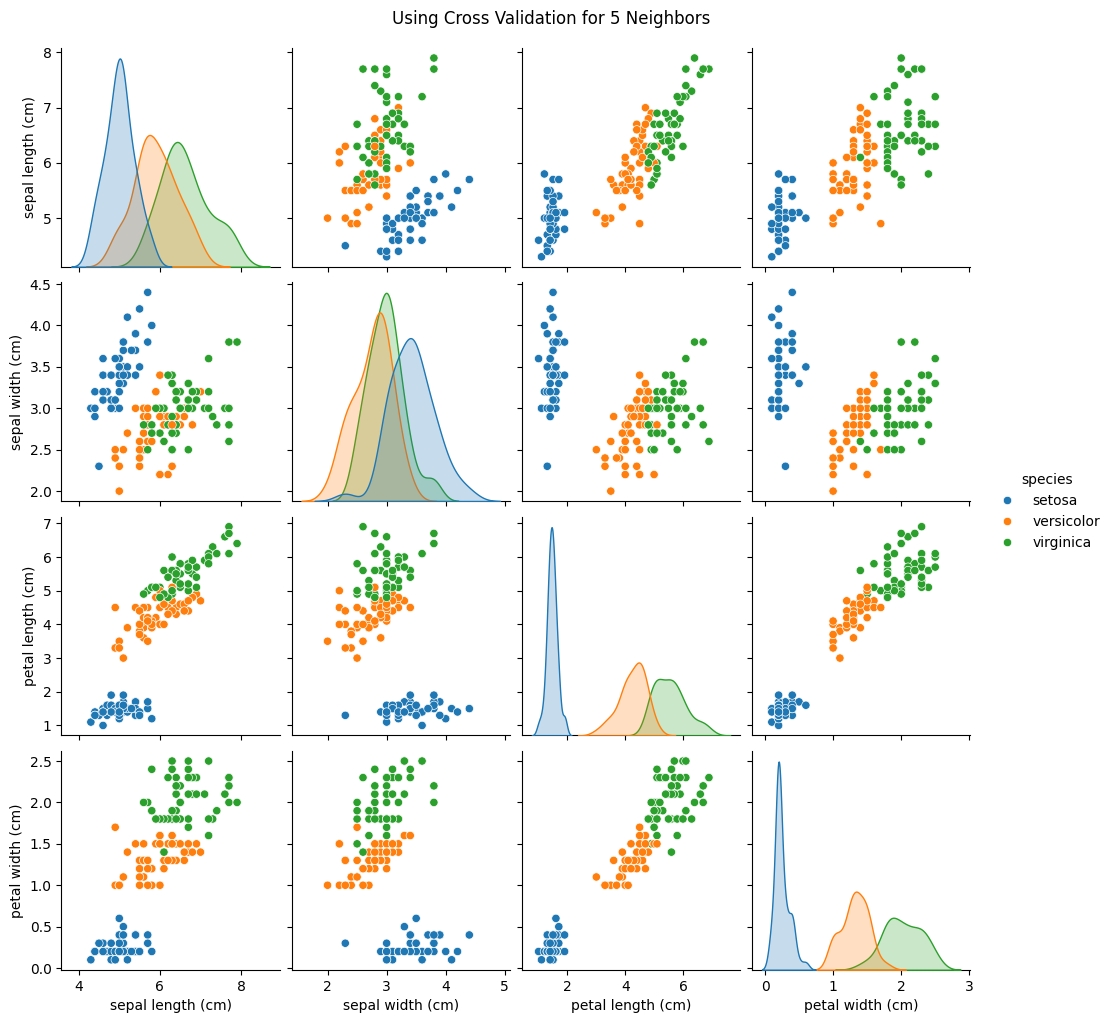

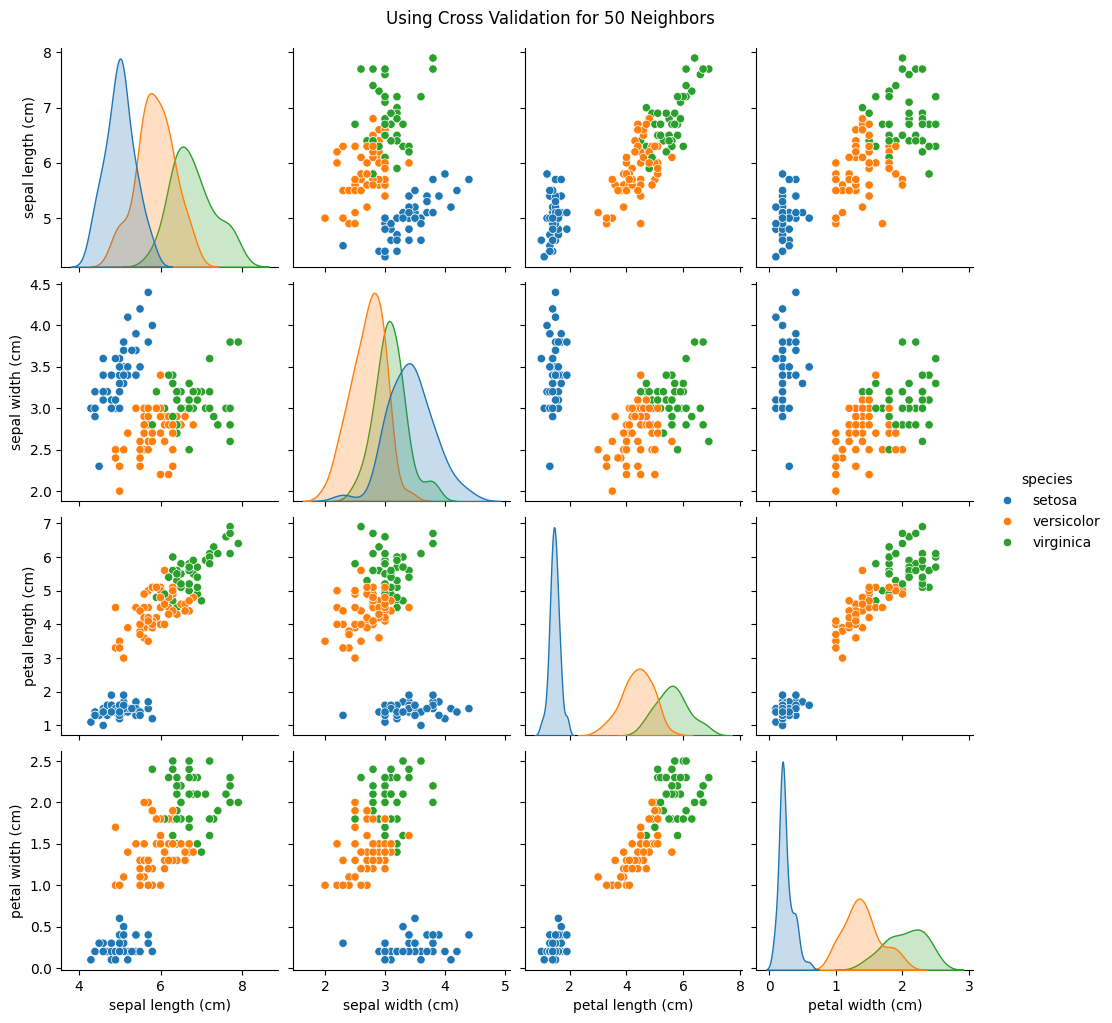

Accuracy for 5 Neighbors:  0.960
Accuracy for 50 Neighbors: 0.873


In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score # for estimating accuracy of the model

knn5 = KNeighborsClassifier(n_neighbors=5)
y_pred_5 = cross_val_predict(knn5, x_scaled, y, cv = 5) # using cross_val instead of KNN
accuracy_score5 = accuracy_score(y, y_pred_5)

knn50 = KNeighborsClassifier(n_neighbors=50)
y_pred_50 = cross_val_predict(knn50, x_scaled, y, cv = 5)
accuracy_score50 = accuracy_score(y, y_pred_50)

df5 = pd.DataFrame(x, columns = feature_names)
df5['species'] = pd.Categorical.from_codes(y_pred_5, target_names)

df50 = pd.DataFrame(x, columns = feature_names)
df50['species'] = pd.Categorical.from_codes(y_pred_50, target_names)

sns.pairplot(df5, hue = 'species')
plt.suptitle("Using Cross Validation for 5 Neighbors", y = 1.02)
plt.show()

sns.pairplot(df50, hue = 'species')
plt.suptitle("Using Cross Validation for 50 Neighbors", y = 1.02)
plt.show()

# accuracy tests
print(f"Accuracy for 5 Neighbors:  {accuracy_score5:.3f}")
print(f"Accuracy for 50 Neighbors: {accuracy_score50:.3f}")

While it is useful to understand the overall accuracy of the model, it is even more useful to understand the nature of the misclassifications that occur. Calculate the completeness and purity for each class in the iris set, as determined via cross validation for the $K = 50$ model. Do your numbers make sense? Use the plot above to explain.

In [7]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y, y_pred_50)
cm = cm.astype(float)

for i, name in enumerate(target_names):
    true_pos = cm[i,i]
    actual_pos = np.sum(cm[i, :]) # sum over row i
    predicted_pos = np.sum(cm[:, i]) # sum over column i

    completeness = true_pos / actual_pos if actual_pos > 0 else 0
    purity = true_pos / predicted_pos if predicted_pos > 0 else 0

    print(f"Completeness = {completeness:.3f}, Purity = {purity:.3f}")

Completeness = 1.000, Purity = 1.000
Completeness = 0.880, Purity = 0.772
Completeness = 0.740, Purity = 0.860


*Complete*

In addition to knowing the completeness and purity for the individual classes, it is also useful to know class predictions for the misclassified sources, or in other words where there is "confusion" for the classifier.

Calculate the confusion matrix for the iris training set and the $K = 50$ model using `sklearn.metrics.confusion_matrix`. Plot three versions of the matrix: (1) the unnormalized matrix, (2) the matrix normalized by rows, and (3) the matrix normalized by columns. Make sure to label your axes and give each plot a title. Which plot(s) is/are most useful, and why?

*Hint - you might find the [`sklearn` confusion matrix tutorial](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#example-model-selection-plot-confusion-matrix-py) helpful for making a nice plot.*

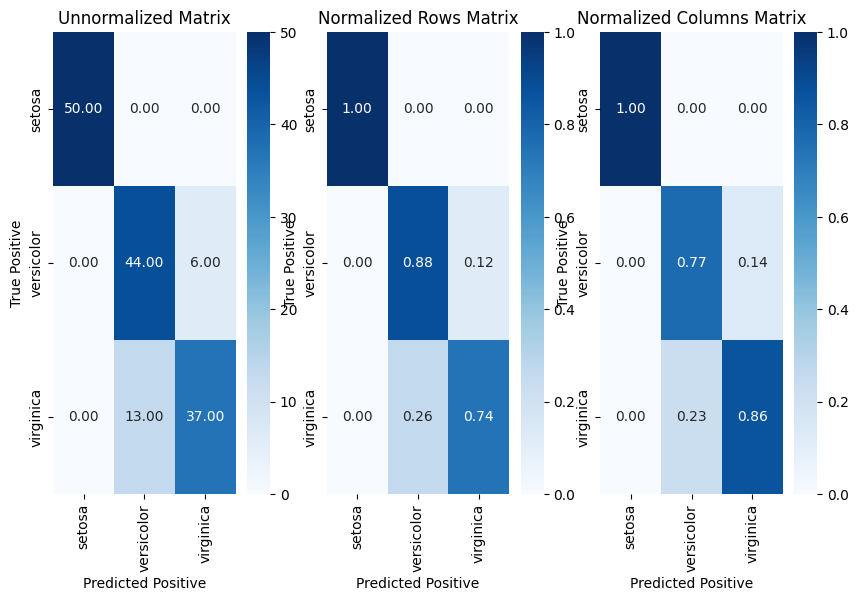

In [11]:
# perform normalization for row and column:
norm_row_cm = cm.astype(float) / cm.sum(axis = 1, keepdims = True)
norm_row_col = cm.astype(float) / cm.sum(axis = 0, keepdims = True)

def confusion_matrix_plot(cm, labels, title, ax):
    sns.heatmap(cm, annot=True, fmt = '.2f' if cm.dtype == float else 'd', cmap = 'Blues', xticklabels=labels, yticklabels=labels, ax=ax, cbar = True) # was suggested to use this and read the documentation but still not sure what some of these things mean
    ax.set_xlabel("Predicted Positive")
    ax.set_ylabel("True Positive")
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(10,6))

confusion_matrix_plot(cm, target_names, "Unnormalized Matrix", axs[0])
confusion_matrix_plot(norm_row_cm, target_names, "Normalized Rows Matrix", axs[1])
confusion_matrix_plot(norm_row_col, target_names, "Normalized Columns Matrix", axs[2])

*Complete*